In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
df


,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [3]:
df.shape

(40, 2)

In [4]:
X=df.drop("Salary",axis=1).values
y=df.Salary.values
y

array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
        60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
        56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
        82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
       113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872],
      dtype=int64)

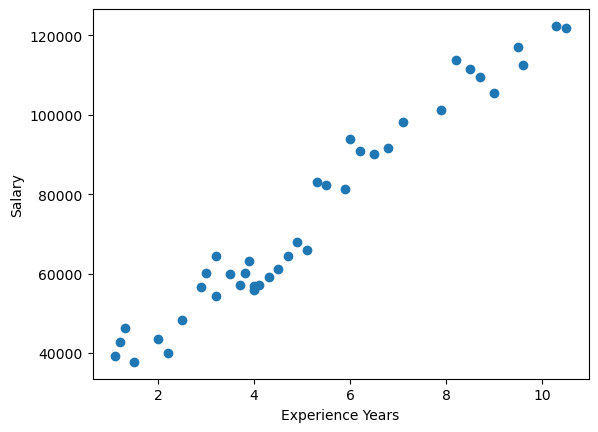

In [5]:
plt.scatter(X,y)
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.show()

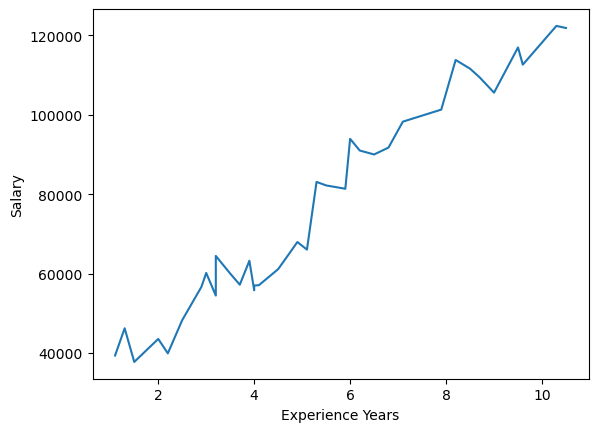

In [6]:
plt.plot(X,y)
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.show()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
y_test

array([66029, 64500, 81363, 43525, 64445, 55794, 90000, 60000],
      dtype=int64)

In [8]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_train_predict=reg.predict(X_train)
y_train_predict

array([ 67017.41811883,  90792.09224067,  85086.17045143, 111713.80546789,
       117419.72725714,  38487.80917261, 125978.609941  ,  93645.05313529,
       108860.84457327,  64164.4572242 , 116468.74029226,  54654.58757547,
        62262.48329446,  47046.69185648,  65115.44418908,  63213.47025933,
       106958.87064352,  53703.60061059, 104105.9097489 ,  37536.82220774,
        83184.19652168,  61311.49632958, 101252.94885428,  78429.26169731,
        49899.6527511 ,  76527.28776756,  72723.33990807,  68919.39204857,
        56556.56150521, 124076.63601125,  40389.78310236,  36585.83524286])

In [10]:
y_test_predict=reg.predict(X_test)
y_test_predict

array([74625.31383782, 70821.36597832, 82233.20955681, 45144.71792673,
       56556.56150521, 64164.4572242 , 87939.13134605, 59409.52239984])

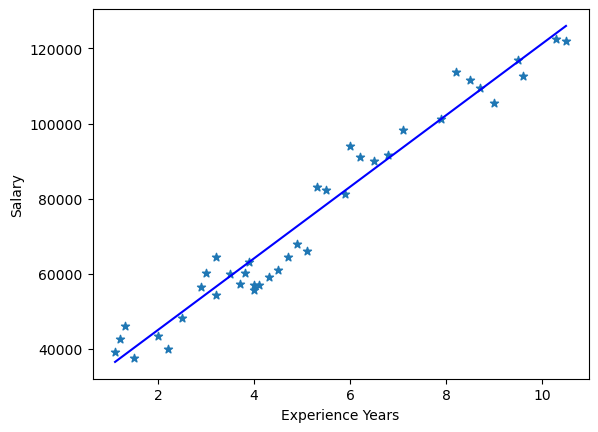

In [11]:
plt.scatter(X,y, marker ='*')
plt.plot(df["Experience Years"].values, reg.predict(df[['Experience Years']]), color ='blue')
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.show()

# mean_absolute_error

In [12]:
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
mae_train=mean_absolute_error(y_train,y_train_predict)
mae_train

4513.21868782588

In [13]:
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
mae_test=mean_absolute_error(y_test,y_test_predict)
mae_test

4539.731159097148

# Mean Squared Error

In [14]:
from sklearn.metrics import mean_squared_error,accuracy_score
mse_train=mean_squared_error(y_train,y_train_predict)
mse_train

28442129.316705346

In [15]:
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,y_test_predict)
mse_test

31765611.212300055

# Root Mean Square Error

In [16]:
RMSE_train=np.sqrt(mse_train)
RMSE_train

5333.116285691261

In [17]:
RMSE_test=np.sqrt(mse_test)
RMSE_test

5636.098935638023

# R Squared value

In [18]:
r2_train=r2_score(y_train,y_train_predict)
r2_train


0.9620439120667255

In [19]:
y_train.shape

(32,)

In [20]:
r2_test=r2_score(y_test,y_test_predict)
r2_test

0.8260957382965146

In [21]:
y_test.shape

(8,)

# Adjusted R-squared

In [22]:
adjusted_r_squared_train = 1 - (1 - r2_train) * ((df.shape[0] - 1) / (df.shape[0] - y_train.shape[0] - 1))
adjusted_r_squared_train

0.788530367228899

In [23]:
adjusted_r_squared_test = 1 - (1 - r2_test) * ((df.shape[0] - 1) / (df.shape[0] - y_test.shape[0] - 1))
adjusted_r_squared_test

0.7812172191472281

# Accuracy

In [24]:
from sklearn.metrics import mean_squared_error

accuary_train=reg.score(X_train,y_train)
accuary_train

0.9620439120667255

In [25]:
accuary_test=reg.score(X_test,y_test)
accuary_test

0.8260957382965146

# coefficent

In [26]:
coefficent=reg.coef_
coefficent

array([9509.86964874])

# intercept

In [27]:
intercept=reg.intercept_
intercept

26124.978629253557